In [32]:
#import basic Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [33]:
#import the dataset
from google.colab import files
upload=files.upload()
iris=pd.read_csv("Iris.csv")
#iris=iris.loc[:,['SepalLengthCm','SepalWidthCm','Species']]
iris.head()

Saving Iris.csv to Iris (5).csv


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
#Split the dataset
X=iris.drop(columns="Species")
y=iris["Species"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=45)

In [35]:
#Fit a Decision Tree to the train part and predict on both test and train. 
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

In [36]:
#performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train,y_train_pred),round(accuracy_score(y_test,y_test_pred),2))

1.0 0.97


In [37]:
path=tree.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.        , 0.00795455, 0.00810185, 0.01484848, 0.27334362,
       0.32948045])

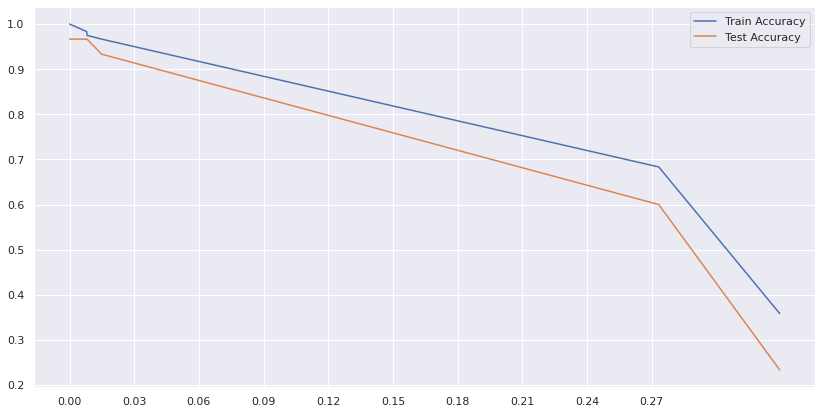

In [41]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.3,0.03))
plt.show()

In [43]:
tree = DecisionTreeClassifier(ccp_alpha=0.02, random_state=40)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)
print(accuracy_score(y_train,y_train_pred),round(accuracy_score(y_test,y_test_pred),2))

0.9666666666666667 0.93
